# 100 numpy exercises

This is a collection of exercises that have been collected in the numpy mailing list, on stack overflow
and in the numpy documentation. The goal of this collection is to offer a quick reference for both old
and new users but also to provide a set of exercises for those who teach.


If you find an error or think you've a better way to solve some of them, feel
free to open an issue at <https://github.com/rougier/numpy-100>.

File automatically generated. See the documentation to update questions/answers/hints programmatically.

In [2]:
import numpy as np

#### 51. Create a structured array representing a position (x,y) and a color (r,g,b) (★★☆)

In [ ]:
Z = np.zeros(10, [ ('position', [ ('x', float, 1),
                                  ('y', float, 1)]),
                   ('color',    [ ('r', float, 1),
                                  ('g', float, 1),
                                  ('b', float, 1)])])
print(Z)

[(([0.], [0.]), ([0.], [0.], [0.])) (([0.], [0.]), ([0.], [0.], [0.]))
 (([0.], [0.]), ([0.], [0.], [0.])) (([0.], [0.]), ([0.], [0.], [0.]))
 (([0.], [0.]), ([0.], [0.], [0.])) (([0.], [0.]), ([0.], [0.], [0.]))
 (([0.], [0.]), ([0.], [0.], [0.])) (([0.], [0.]), ([0.], [0.], [0.]))
 (([0.], [0.]), ([0.], [0.], [0.])) (([0.], [0.]), ([0.], [0.], [0.]))]


#### 52. Consider a random vector with shape (100,2) representing coordinates, find point by point distances (★★☆)

In [ ]:
Z = np.random.random((10,2))
X,Y = np.atleast_2d(Z[:,0], Z[:,1])
D = np.sqrt( (X-X.T)**2 + (Y-Y.T)**2)
print(D)

[[0.         1.04057258 0.26318082 0.34003815 0.58009734 0.51389907
  0.65211078 0.90735437 0.53651747 0.84344167]
 [1.04057258 0.         0.7920365  1.06351782 0.62036915 0.62559406
  0.50497389 0.97299624 0.54148971 0.20062846]
 [0.26318082 0.7920365  0.         0.46866101 0.33166242 0.36967516
  0.47820845 0.88205073 0.34247902 0.60061217]
 [0.34003815 1.06351782 0.46866101 0.         0.78894983 0.44013533
  0.57649197 0.61643666 0.52406608 0.86587849]
 [0.58009734 0.62036915 0.33166242 0.78894983 0.         0.53128486
  0.55949295 1.08121211 0.44037007 0.47976825]
 [0.51389907 0.62559406 0.36967516 0.44013533 0.53128486 0.
  0.14430186 0.55068369 0.10742277 0.43139386]
 [0.65211078 0.50497389 0.47820845 0.57649197 0.55949295 0.14430186
  0.         0.54949357 0.13836715 0.32399069]
 [0.90735437 0.97299624 0.88205073 0.61643666 1.08121211 0.55068369
  0.54949357 0.         0.64323137 0.83976713]
 [0.53651747 0.54148971 0.34247902 0.52406608 0.44037007 0.10742277
  0.13836715 0.64323

#### 53. How to convert a float (32 bits) array into an integer (32 bits) in place?

In [ ]:
Z = (np.random.rand(10)*100).astype(np.float32)
Y = Z.view(np.int32)
Y[:] = Z
print(Y)

[42 74 78 44 67 24 30 64  6 46]


#### 54. How to read the following file? (★★☆)
```
1, 2, 3, 4, 5
6,  ,  , 7, 8
 ,  , 9,10,11
```

In [ ]:
from io import StringIO

s = StringIO('''
1, 2, 3, 4, 5
6,  ,  , 7, 8
  ,  , 9,10,11
''')
Z = np.genfromtxt(s, delimiter=",", dtype=np.integer)
print(Z)

[[ 1  2  3  4  5]
 [ 6 -1 -1  7  8]
 [-1 -1  9 10 11]]


#### 55. What is the equivalent of enumerate for numpy arrays? (★★☆)

In [ ]:
Z = np.arange(9).reshape(3,3)
for index, value in np.ndenumerate(Z):
    print(index, value)
for index in np.ndindex(Z.shape):
    print(index, Z[index])

(0, 0) 0
(0, 1) 1
(0, 2) 2
(1, 0) 3
(1, 1) 4
(1, 2) 5
(2, 0) 6
(2, 1) 7
(2, 2) 8
(0, 0) 0
(0, 1) 1
(0, 2) 2
(1, 0) 3
(1, 1) 4
(1, 2) 5
(2, 0) 6
(2, 1) 7
(2, 2) 8


#### 56. Generate a generic 2D Gaussian-like array (★★☆)

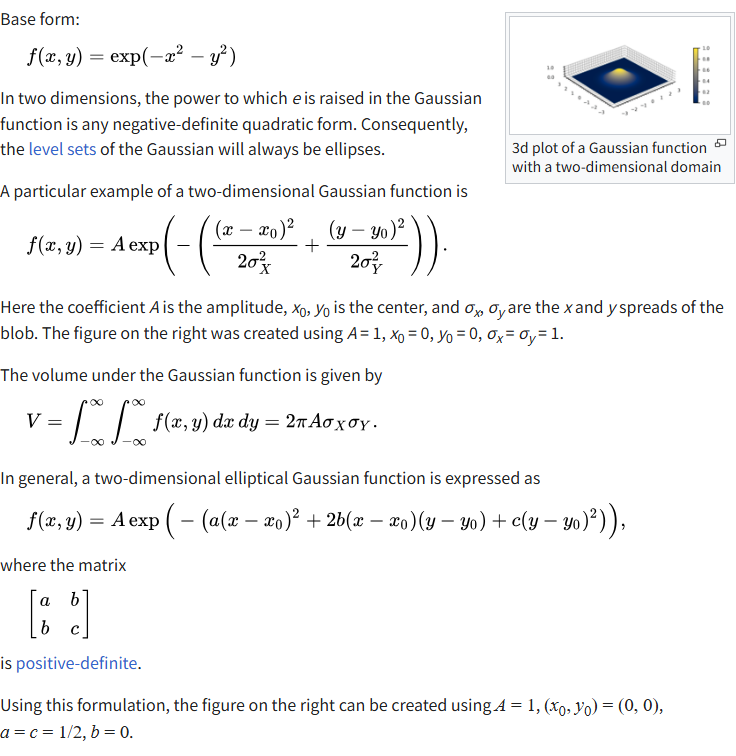
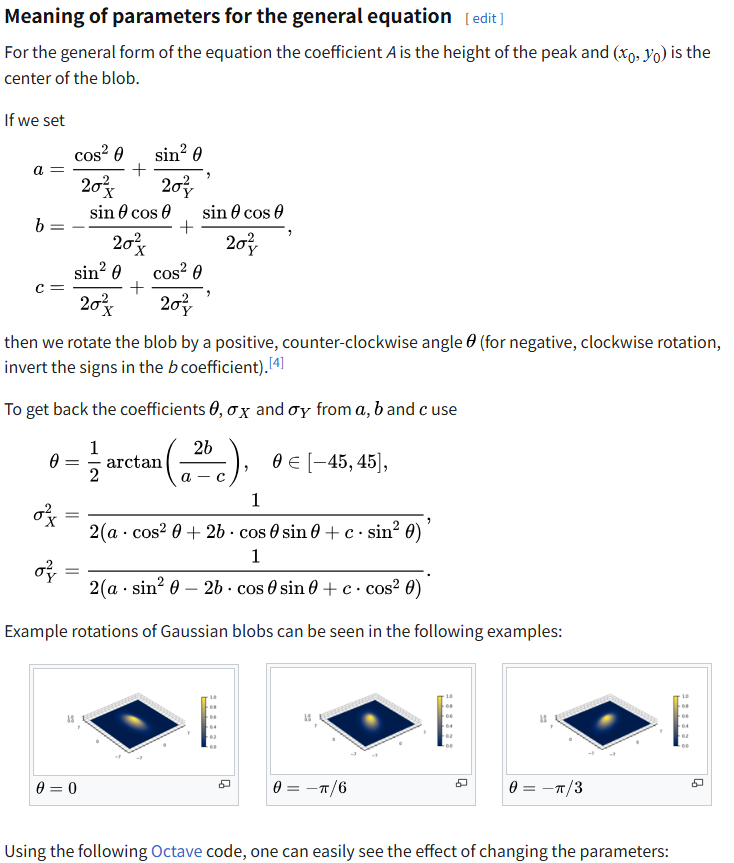
```python
A = 1;
x0 = 0; y0 = 0;

sigma_X = 1;
sigma_Y = 2;

[X, Y] = meshgrid(-5:.1:5, -5:.1:5);

for theta = 0:pi/100:pi
    a = cos(theta)^2 / (2 * sigma_X^2) + sin(theta)^2 / (2 * sigma_Y^2);
    b = sin(2 * theta) / (4 * sigma_X^2) - sin(2 * theta) / (4 * sigma_Y^2);
    c = sin(theta)^2 / (2 * sigma_X^2) + cos(theta)^2 / (2 * sigma_Y^2);

    Z = A * exp(-(a * (X - x0).^2 + 2 * b * (X - x0) .* (Y - y0) + c * (Y - y0).^2));

    surf(X, Y, Z);
    shading interp;
    view(-36, 36)
    waitforbuttonpress
end
```
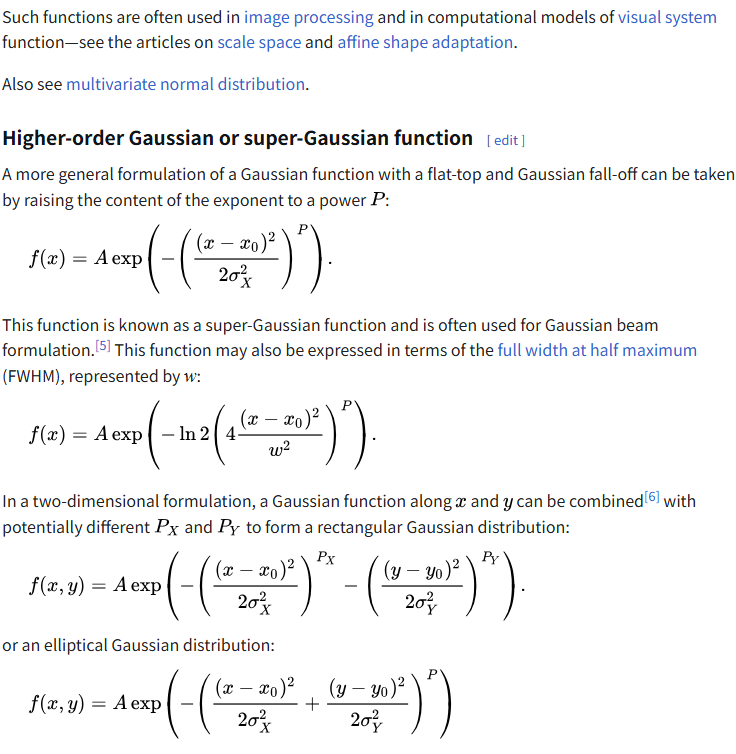


In [ ]:
X, Y = np.meshgrid(np.linspace(-1,1,10), np.linspace(-1,1,10))
D = np.sqrt(X*X+Y*Y)
sigma, mu = 1.0, 0.0

G = np.exp(-( (D-mu)**2 / ( 2.0 * sigma**2 ) ) )
print(G)

[[0.36787944 0.44822088 0.51979489 0.57375342 0.60279818 0.60279818
  0.57375342 0.51979489 0.44822088 0.36787944]
 [0.44822088 0.54610814 0.63331324 0.69905581 0.73444367 0.73444367
  0.69905581 0.63331324 0.54610814 0.44822088]
 [0.51979489 0.63331324 0.73444367 0.81068432 0.85172308 0.85172308
  0.81068432 0.73444367 0.63331324 0.51979489]
 [0.57375342 0.69905581 0.81068432 0.89483932 0.9401382  0.9401382
  0.89483932 0.81068432 0.69905581 0.57375342]
 [0.60279818 0.73444367 0.85172308 0.9401382  0.98773022 0.98773022
  0.9401382  0.85172308 0.73444367 0.60279818]
 [0.60279818 0.73444367 0.85172308 0.9401382  0.98773022 0.98773022
  0.9401382  0.85172308 0.73444367 0.60279818]
 [0.57375342 0.69905581 0.81068432 0.89483932 0.9401382  0.9401382
  0.89483932 0.81068432 0.69905581 0.57375342]
 [0.51979489 0.63331324 0.73444367 0.81068432 0.85172308 0.85172308
  0.81068432 0.73444367 0.63331324 0.51979489]
 [0.44822088 0.54610814 0.63331324 0.69905581 0.73444367 0.73444367
  0.69905581 0

#### 57. How to randomly place p elements in a 2D array? (★★☆)

In [ ]:
n = 10
p = 3
Z = np.zeros((n,n))
np.put(Z, np.random.choice(range(n*n), p, replace=False),1)
print(Z)

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


#### 58. Subtract the mean of each row of a matrix (★★☆)

In [ ]:
X = np.random.rand(5, 10)
Y = X - X.mean(axis=1, keepdims=True)

print(Y)

[[-0.30360694 -0.31698928 -0.31473683 -0.33101146  0.19619896  0.43088684
   0.54913695  0.23460674  0.23555653 -0.38004151]
 [-0.04111418 -0.2148895   0.15893996  0.23632453 -0.05815644  0.26916121
   0.07402065  0.29621457 -0.24011445 -0.48038634]
 [ 0.21726082  0.15631668  0.22520474  0.1848496  -0.16291388 -0.23301419
  -0.26020684  0.05983218  0.2728182  -0.46014731]
 [-0.02232321 -0.2718615   0.51385319  0.41076607 -0.16254403  0.1330907
  -0.43559235 -0.03243925 -0.31183493  0.17888532]
 [ 0.14244417  0.0244231  -0.50501774 -0.14909293 -0.29096182  0.30919439
   0.26063131  0.10228959  0.33513895 -0.22904902]]


#### 59. How to sort an array by the nth column? (★★☆)

In [ ]:
Z = np.random.randint(0,10,(3,3))

print(Z)
print(Z[Z[:,1].argsort()])

[[4 9 6]
 [7 7 6]
 [9 2 8]]
[[9 2 8]
 [7 7 6]
 [4 9 6]]


#### 60. How to tell if a given 2D array has null columns? (★★☆)

In [ ]:
Z = np.random.randint(0,3,(3,10))
print((~Z.any(axis=0)).any())

True


#### 61. Find the nearest value from a given value in an array (★★☆)

In [ ]:
Z = np.random.uniform(0,1,10)
z = 0.5
m = Z.flat[np.abs(Z - z).argmin()]
print(m)

0.5199670754594463


#### 62. Considering two arrays with shape (1,3) and (3,1), how to compute their sum using an iterator? (★★☆)

In [ ]:
A = np.arange(3).reshape(3,1)
B = np.arange(3).reshape(1,3)
it = np.nditer([A,B,None])

for x,y,z in it:
  z[...] = x + y
print(it.operands[2])

[[0 1 2]
 [1 2 3]
 [2 3 4]]


#### 63. Create an array class that has a name attribute (★★☆)

In [ ]:
class NamedArr(np.ndarray):
    def __new__(cls, array, name="no name"):
        obj = np.asarray(array).view(cls)
        obj.name = name
        return obj
    def __array_finalize__(self, obj):
        if obj is None: return
        self.name = getattr(obj, 'name', "no name")

Z = NamedArr(np.arange(10), "range_10")
print(Z.name)

range_10


#### 64. Consider a given vector, how to add 1 to each element indexed by a second vector (be careful with repeated indices)? (★★★)

In [ ]:
Z = np.ones(10)
I = np.random.randint(0,len(Z),20)

np.add.at(Z, I, 1)
print(Z)

[2. 2. 3. 4. 4. 2. 6. 2. 2. 3.]


#### 65. How to accumulate elements of a vector (X) to an array (F) based on an index list (I)? (★★★)

In [ ]:
X = [1,2,3,4,5,6]
I = [1,3,9,3,4,1]
F = np.bincount(I,X)
print(F)

[0. 7. 0. 6. 5. 0. 0. 0. 0. 3.]


#### 66. Considering a (w,h,3) image of (dtype=ubyte), compute the number of unique colors (★★☆)

In [ ]:
w, h = 256, 256
I = np.random.randint(0, 4, (h, w, 3)).astype(np.ubyte)

colors = np.unique(I.reshape(-1, 3), axis=0)
n = len(colors)
print(n)

64


#### 67. Considering a four dimensions array, how to get sum over the last two axis at once? (★★★)

In [ ]:
A = np.random.randint(0,10,(3,4,3,4))
sum = A.sum(axis=(-2,-1))
print(sum)

[[53 44 50 60]
 [56 47 60 67]
 [62 37 70 64]]


#### 68. Considering a one-dimensional vector D, how to compute means of subsets of D using a vector S of same size describing subset  indices? (★★★)

In [ ]:
import pandas as pd

D = np.random.uniform(0,1,64)
S = np.random.randint(0,16,64)
D_sums = np.bincount(S, weights=D)
D_counts = np.bincount(S)
D_means = D_sums / D_counts
# print(D_means)
print(pd.Series(D).groupby(S).mean())

0     0.488489
1     0.599983
2     0.606293
3     0.484635
4     0.205375
5     0.426880
6     0.882303
7     0.488072
8     0.631025
9     0.327908
10    0.590014
11    0.577370
12    0.275349
14    0.859134
15    0.531763
dtype: float64


<ipython-input-107-b7638c48e7cc>:7: RuntimeWarning: invalid value encountered in divide
  D_means = D_sums / D_counts


#### 69. How to get the diagonal of a dot product? (★★★)

In [ ]:
A = np.random.uniform(0,1,(5,5))
B = np.random.uniform(0,1,(5,5))

np.sum(A * B.T, axis=1)

array([0.40596413, 1.39553369, 1.20570694, 1.69019576, 1.62092841])

#### 70. Consider the vector [1, 2, 3, 4, 5], how to build a new vector with 3 consecutive zeros interleaved between each value? (★★★)

In [ ]:
Z = np.array([1,2,3,4,5])
nz = 3
Z0 = np.zeros(len(Z) + (len(Z)-1)*(nz))
Z0[::nz+1] = Z
print(Z0)

[1. 0. 0. 0. 2. 0. 0. 0. 3. 0. 0. 0. 4. 0. 0. 0. 5.]


#### 71. Consider an array of dimension (5,5,3), how to mulitply it by an array with dimensions (5,5)? (★★★)

In [ ]:
A = np.ones((5,5,3))
B = 2*np.ones((5,5))
print(A * B[:,:,None])

[[[2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]]

 [[2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]]

 [[2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]]

 [[2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]]

 [[2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]
  [2. 2. 2.]]]


#### 72. How to swap two rows of an array? (★★★)

In [ ]:
A = np.arange(25).reshape(5,5)
A[[0,1]] = A[[1,0]]
print(A)

[[ 5  6  7  8  9]
 [ 0  1  2  3  4]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


#### 73. Consider a set of 10 triplets describing 10 triangles (with shared vertices), find the set of unique line segments composing all the  triangles (★★★)

In [ ]:
faces = np.random.randint(0,100,(10,3))
F = np.roll(faces.repeat(2,axis=1),-1,axis=1)
F = F.reshape(len(F)*3,2)
F = np.sort(F,axis=1)
G = F.view( dtype=[('p0',F.dtype),('p1',F.dtype)] )
G = np.unique(G)
print(G)

[( 1, 25) ( 1, 32) ( 2, 26) ( 2, 48) ( 3, 31) ( 3, 57) ( 5, 92) ( 5, 97)
 ( 8, 43) ( 8, 73) (14, 31) (14, 42) (23, 93) (23, 96) (25, 32) (25, 65)
 (25, 90) (26, 48) (31, 42) (31, 51) (31, 57) (31, 66) (33, 80) (33, 88)
 (43, 73) (51, 66) (65, 90) (80, 88) (92, 97) (93, 96)]


#### 74. Given a sorted array C that corresponds to a bincount, how to produce an array A such that np.bincount(A) == C? (★★★)

In [ ]:
C = np.bincount([1,1,2,3,4,4,6])
A = np.repeat(np.arange(len(C)), C)
print(A)

[1 1 2 3 4 4 6]


#### 75. How to compute averages using a sliding window over an array? (★★★)

In [ ]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

Z = np.arange(20)
print(moving_average(Z, n=3))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.]


#### 76. Consider a one-dimensional array Z, build a two-dimensional array whose first row is (Z[0],Z[1],Z[2]) and each subsequent row is  shifted by 1 (last row should be (Z[-3],Z[-2],Z[-1]) (★★★)

In [ ]:
from numpy.lib import stride_tricks

def rolling(a, window):
    shape = (a.size - window + 1, window)
    strides = (a.strides[0], a.strides[0])
    return stride_tricks.as_strided(a, shape=shape, strides=strides)

Z = rolling(np.arange(10), 3)
print(Z)

[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]
 [5 6 7]
 [6 7 8]
 [7 8 9]]


#### 77. How to negate a boolean, or to change the sign of a float inplace? (★★★)

In [ ]:
Z = np.random.randint(0,2,100)
np.logical_not(Z, out=Z)

Z = np.random.uniform(-1.0,1.0,100)
np.negative(Z, out=Z)

array([-0.96265716, -0.4522723 , -0.21279629,  0.09386779, -0.47611969,
       -0.99539083, -0.66575218, -0.78669713,  0.36105764,  0.11243814,
        0.97880121,  0.97335561,  0.53734051,  0.40109273, -0.91733591,
        0.37719584, -0.23549978, -0.09240935,  0.50925111, -0.04855874,
       -0.81468184,  0.28961497,  0.9297448 ,  0.95107357,  0.73758185,
       -0.30519152, -0.68003866, -0.62193876, -0.98557314,  0.35808271,
        0.6398891 , -0.66313474, -0.19495549, -0.06873421,  0.22181112,
        0.9642292 ,  0.88414827,  0.31425371, -0.63877778,  0.4086181 ,
        0.22191833,  0.73035081,  0.45155238, -0.45933024, -0.05972264,
        0.81578042,  0.46523015, -0.70738839, -0.84032769, -0.34758261,
        0.85150701, -0.45108417,  0.88007943, -0.08871372,  0.32244068,
       -0.90581865,  0.76089264,  0.88495204,  0.35896947,  0.73574726,
       -0.92965201,  0.89393891, -0.16225741, -0.65109688, -0.75957508,
        0.9479759 , -0.79164011, -0.91555961, -0.62453608, -0.28

#### 78. Consider 2 sets of points P0,P1 describing lines (2d) and a point p, how to compute distance from p to each line i (P0[i],P1[i])? (★★★)

In [ ]:
def distance(P0, P1, p):
    T = P1 - P0
    L = (T**2).sum(axis=1)
    U = -((P0[:,0]-p[...,0])*T[:,0] + (P0[:,1]-p[...,1])*T[:,1]) / L
    U = U.reshape(len(U),1)
    D = P0 + U*T - p
    return np.sqrt((D**2).sum(axis=1))

P0 = np.random.uniform(-10,10,(10,2))
P1 = np.random.uniform(-10,10,(10,2))
p  = np.random.uniform(-10,10,( 1,2))
print(distance(P0, P1, p))

[11.92905223  2.28419402 10.35403315  1.45843232 10.6609007   8.00120226
  5.9648906   2.34226658  2.1279212   4.43802448]


#### 79. Consider 2 sets of points P0,P1 describing lines (2d) and a set of points P, how to compute distance from each point j (P[j]) to each line i (P0[i],P1[i])? (★★★)

In [ ]:
P0 = np.random.uniform(-10, 10, (10,2))
P1 = np.random.uniform(-10,10,(10,2))
p = np.random.uniform(-10, 10, (10,2))

print(np.array([distance(P0,P1,p_i) for p_i in p]))

[[14.91307371 13.5532745  11.77468143  6.10764531 16.33926597  4.59865413
   2.37439685  1.40715841  6.8842571   1.08688213]
 [ 3.61275347  0.78691501  6.13433088  5.90396334 19.16131653  8.3351869
  10.63729757 11.39443322 13.73445955 11.48132395]
 [ 0.59003847  0.73764289  4.36741746  8.5423949   6.06223778  7.2932735
   7.74710616  1.21863781  1.47678944  5.70664392]
 [ 4.57696138  2.21643967  9.12982284 12.17693283  2.39038619  9.92592498
   9.78794304  0.16003152  0.99052006  6.69385703]
 [ 4.33191739  8.55039031  5.93897583  2.4339894   1.94876026  1.14531356
   1.62519897  9.78937611  8.60349625  4.77604809]
 [ 8.08406431 11.2719305   1.35222626  0.96371953  1.68328181  3.54996847
   3.44948281  8.6199164   6.09687648  5.5748436 ]
 [12.08377844 10.4477033  10.2001235   3.13559721 16.7724776   1.47343535
   0.73404593  3.63934132  8.3133211   1.85798114]
 [14.08510742 14.61189985  7.79502572  6.00369112 10.54179737  6.13450638
   4.70118301  3.75565931  1.10323147  4.60025198]
 [

#### 80. Consider an arbitrary array, write a function that extract a subpart with a fixed shape and centered on a given element (pad with a `fill` value when necessary) (★★★)

In [3]:
Z = np.random.randint(0,10,(10,10))
shape = (5,5)
fill  = 0
position = (1,1)

R = np.ones(shape, dtype=Z.dtype)*fill
P  = np.array(list(position)).astype(int)
Rs = np.array(list(R.shape)).astype(int)
Zs = np.array(list(Z.shape)).astype(int)

R_start = np.zeros((len(shape),)).astype(int)
R_stop  = np.array(list(shape)).astype(int)
Z_start = (P-Rs//2)
Z_stop  = (P+Rs//2)+Rs%2

R_start = (R_start - np.minimum(Z_start,0)).tolist()
Z_start = (np.maximum(Z_start,0)).tolist()
R_stop = np.maximum(R_start, (R_stop - np.maximum(Z_stop-Zs,0))).tolist()
Z_stop = (np.minimum(Z_stop,Zs)).tolist()

r = [slice(start,stop) for start,stop in zip(R_start,R_stop)]
z = [slice(start,stop) for start,stop in zip(Z_start,Z_stop)]
R[r] = Z[z]
print(Z)
print(R)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

#### 81. Consider an array Z = [1,2,3,4,5,6,7,8,9,10,11,12,13,14], how to generate an array R = [[1,2,3,4], [2,3,4,5], [3,4,5,6], ..., [11,12,13,14]]? (★★★)

In [ ]:
Z = np.arange(1,15,dtype=np.uint32)
R = stride_tricks.as_strided(Z,(11,4),(4,4))
print(R)

[[ 1  2  3  4]
 [ 2  3  4  5]
 [ 3  4  5  6]
 [ 4  5  6  7]
 [ 5  6  7  8]
 [ 6  7  8  9]
 [ 7  8  9 10]
 [ 8  9 10 11]
 [ 9 10 11 12]
 [10 11 12 13]
 [11 12 13 14]]


#### 82. Compute a matrix rank (★★★)

In [ ]:
Z = np.random.uniform(0,1,(10,10))
U, S, V = np.linalg.svd(Z) # Singular Value Decomposition
rank = np.sum(S > 1e-10)
print(rank)

10


#### 83. How to find the most frequent value in an array?

In [ ]:
Z = np.random.randint(0,10,50)
print(np.bincount(Z).argmax())

2


#### 84. Extract all the contiguous 3x3 blocks from a random 10x10 matrix (★★★)

In [ ]:
Z = np.random.randint(0,5,(10,10))
n = 3
i = 1 + (Z.shape[0]-3)
j = 1 + (Z.shape[1]-3)
C = stride_tricks.as_strided(Z, shape=(i, j, n, n), strides=Z.strides + Z.strides)
print(C)

[[[[4 0 2]
   [1 3 4]
   [2 0 4]]

  [[0 2 4]
   [3 4 1]
   [0 4 3]]

  [[2 4 3]
   [4 1 4]
   [4 3 2]]

  [[4 3 2]
   [1 4 4]
   [3 2 0]]

  [[3 2 1]
   [4 4 3]
   [2 0 4]]

  [[2 1 1]
   [4 3 2]
   [0 4 1]]

  [[1 1 3]
   [3 2 4]
   [4 1 2]]

  [[1 3 2]
   [2 4 3]
   [1 2 4]]]


 [[[1 3 4]
   [2 0 4]
   [3 1 0]]

  [[3 4 1]
   [0 4 3]
   [1 0 0]]

  [[4 1 4]
   [4 3 2]
   [0 0 4]]

  [[1 4 4]
   [3 2 0]
   [0 4 1]]

  [[4 4 3]
   [2 0 4]
   [4 1 0]]

  [[4 3 2]
   [0 4 1]
   [1 0 2]]

  [[3 2 4]
   [4 1 2]
   [0 2 0]]

  [[2 4 3]
   [1 2 4]
   [2 0 2]]]


 [[[2 0 4]
   [3 1 0]
   [3 0 0]]

  [[0 4 3]
   [1 0 0]
   [0 0 4]]

  [[4 3 2]
   [0 0 4]
   [0 4 4]]

  [[3 2 0]
   [0 4 1]
   [4 4 2]]

  [[2 0 4]
   [4 1 0]
   [4 2 0]]

  [[0 4 1]
   [1 0 2]
   [2 0 3]]

  [[4 1 2]
   [0 2 0]
   [0 3 2]]

  [[1 2 4]
   [2 0 2]
   [3 2 3]]]


 [[[3 1 0]
   [3 0 0]
   [4 0 0]]

  [[1 0 0]
   [0 0 4]
   [0 0 2]]

  [[0 0 4]
   [0 4 4]
   [0 2 3]]

  [[0 4 1]
   [4 4 2]
   [2 3 0]]

  [[4 1 0]
   

#### 85. Create a 2D array subclass such that Z[i,j] == Z[j,i] (★★★)

In [ ]:
class Symetric(np.ndarray):
    def __setitem__(self, index, value):
        i,j = index
        super(Symetric, self).__setitem__((i,j), value)
        super(Symetric, self).__setitem__((j,i), value)

def symetric(Z):
    return np.asarray(Z + Z.T - np.diag(Z.diagonal())).view(Symetric)

S = symetric(np.random.randint(0,10,(5,5)))
S[2,3] = 42
print(S)

[[ 6 17 10  9 12]
 [17  9 15  9 13]
 [10 15  1 42 12]
 [ 9  9 42  0 15]
 [12 13 12 15  2]]


#### 86. Consider a set of p matrices with shape (n,n) and a set of p vectors with shape (n,1). How to compute the sum of of the p matrix products at once? (result has shape (n,1)) (★★★)

In [ ]:
p, n = 10, 20
M = np.ones((p,n,n))
V = np.ones((p,n,1))
S = np.tensordot(M, V, axes=[[0, 2], [0, 1]])
print(S)

[[200.]
 [200.]
 [200.]
 [200.]
 [200.]
 [200.]
 [200.]
 [200.]
 [200.]
 [200.]
 [200.]
 [200.]
 [200.]
 [200.]
 [200.]
 [200.]
 [200.]
 [200.]
 [200.]
 [200.]]


#### 87. Consider a 16x16 array, how to get the block-sum (block size is 4x4)? (★★★)

In [ ]:
Z = np.ones((16,16))
k = 4
S = np.add.reduceat(np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0),
                                       np.arange(0, Z.shape[1], k), axis=1)
print(S)

[[16. 16. 16. 16.]
 [16. 16. 16. 16.]
 [16. 16. 16. 16.]
 [16. 16. 16. 16.]]


#### 88. How to implement the Game of Life using numpy arrays? (★★★)

In [ ]:
def iterate(Z):
    # Count neighbours
    N = (Z[0:-2,0:-2] + Z[0:-2,1:-1] + Z[0:-2,2:] +
         Z[1:-1,0:-2]                + Z[1:-1,2:] +
         Z[2:  ,0:-2] + Z[2:  ,1:-1] + Z[2:  ,2:])

    # Apply rules
    birth = (N==3) & (Z[1:-1,1:-1]==0)
    survive = ((N==2) | (N==3)) & (Z[1:-1,1:-1]==1)
    Z[...] = 0
    Z[1:-1,1:-1][birth | survive] = 1
    return Z

Z = np.random.randint(0,2,(50,50))
for i in range(100): Z = iterate(Z)
print(Z)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### 89. How to get the n largest values of an array (★★★)

In [ ]:
Z = np.arange(10000)
np.random.shuffle(Z)
n = 5
print (Z[np.argsort(Z)[-n:]])

[9995 9996 9997 9998 9999]


#### 90. Given an arbitrary number of vectors, build the cartesian product (every combinations of every item) (★★★)

In [ ]:
def cartesian(arrays):
    arrays = [np.asarray(a) for a in arrays]
    shape = (len(x) for x in arrays)

    ix = np.indices(shape, dtype=int)
    ix = ix.reshape(len(arrays), -1).T

    for n, arr in enumerate(arrays):
        ix[:, n] = arrays[n][ix[:, n]]

    return ix

print (cartesian(([1, 2, 3], [4, 5], [6, 7])))

[[1 4 6]
 [1 4 7]
 [1 5 6]
 [1 5 7]
 [2 4 6]
 [2 4 7]
 [2 5 6]
 [2 5 7]
 [3 4 6]
 [3 4 7]
 [3 5 6]
 [3 5 7]]


#### 91. How to create a record array from a regular array? (★★★)

In [ ]:
Z = np.array([("Hello", 2.5, 3),
              ("World", 3.6, 2)])
R = np.core.records.fromarrays(Z.T,
                               names='col1, col2, col3',
                               formats = 'S8, f8, i8')
print(R)

[(b'Hello', 2.5, 3) (b'World', 3.6, 2)]


<ipython-input-32-6f6badb10b74>:3: DeprecationWarning: numpy.core is deprecated and has been renamed to numpy._core. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.records.
  R = np.core.records.fromarrays(Z.T,


#### 92. Consider a large vector Z, compute Z to the power of 3 using 3 different methods (★★★)

In [ ]:
x = np.random.rand(int(5e7))

%timeit np.power(x,3)
%timeit x*x*x
%timeit np.einsum('i,i,i->i',x,x,x)

1.88 s ± 853 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
202 ms ± 3.01 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
269 ms ± 85.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### 93. Consider two arrays A and B of shape (8,3) and (2,2). How to find rows of A that contain elements of each row of B regardless of the order of the elements in B? (★★★)

In [ ]:
A = np.random.randint(0,5,(8,3))
B = np.random.randint(0,5,(2,2))

C = (A[..., np.newaxis, np.newaxis] == B)
rows = np.where(C.any((3,1)).all(1))[0]
print(rows)

[2]


#### 94. Considering a 10x3 matrix, extract rows with unequal values (e.g. [2,2,3]) (★★★)

In [ ]:
Z = np.random.randint(0,5,(10,3))
# print(Z)
# soluiton for numerical arrays only, will work for any number of columns in Z
U = Z[Z.max(axis=1) != Z.min(axis=1),:]
print(U)

[[3 1 4]
 [1 3 1]
 [0 4 4]
 [3 1 1]
 [1 4 3]
 [3 3 0]
 [1 2 0]
 [1 1 2]
 [2 3 4]
 [4 4 2]]


#### 95. Convert a vector of ints into a matrix binary representation (★★★)

In [ ]:
I = np.array([0, 1, 2, 3, 15, 16, 32, 64, 128])
B = ((I.reshape(-1,1) & (2**np.arange(8))) != 0).astype(int)
print(B[:,::-1])

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 1]
 [0 0 0 0 1 1 1 1]
 [0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]]


#### 96. Given a two dimensional array, how to extract unique rows? (★★★)

In [ ]:
Z = np.random.randint(0,2,(6,3))
T = np.ascontiguousarray(Z).view(np.dtype((np.void, Z.dtype.itemsize * Z.shape[1])))
_, idx = np.unique(T, return_index=True)
uZ = Z[idx]
print(uZ)

[[0 1 0]
 [0 1 1]
 [1 0 1]]


#### 97. Considering 2 vectors A & B, write the einsum equivalent of inner, outer, sum, and mul function (★★★)

In [ ]:
A = np.random.uniform(0,1,10)
B = np.random.uniform(0,1,10)

np.einsum('i->', A)       # np.sum(A)
np.einsum('i,i->i', A, B) # A * B
np.einsum('i,i', A, B)    # np.inner(A, B)
np.einsum('i,j->ij', A, B)    # np.outer(A, B)

array([[0.25674083, 0.65112789, 0.47566113, 0.28825678, 0.71699373,
        0.4148943 , 0.0147585 , 0.61937933, 0.4647502 , 0.05466888],
       [0.08046907, 0.20407995, 0.14908423, 0.09034697, 0.22472397,
        0.13003837, 0.00462569, 0.19412915, 0.14566447, 0.01713461],
       [0.09599206, 0.24344824, 0.1778435 , 0.10777546, 0.26807462,
        0.15512358, 0.00551801, 0.23157787, 0.17376405, 0.02043998],
       [0.16143969, 0.40943189, 0.29909767, 0.18125705, 0.4508486 ,
        0.26088724, 0.00928021, 0.38946827, 0.29223683, 0.03437602],
       [0.09781132, 0.24806214, 0.18121404, 0.10981805, 0.27315525,
        0.15806353, 0.00562259, 0.2359668 , 0.17705727, 0.02082737],
       [0.06253783, 0.15860401, 0.1158632 , 0.07021459, 0.17464784,
        0.1010614 , 0.00359493, 0.15087058, 0.11320548, 0.01331644],
       [0.2324173 , 0.58944027, 0.43059717, 0.26094744, 0.64906601,
        0.37558737, 0.01336029, 0.56069957, 0.42071994, 0.04948957],
       [0.22987654, 0.58299657, 0.4258899

#### 98. Considering a path described by two vectors (X,Y), how to sample it using equidistant samples (★★★)?

In [ ]:
phi = np.arange(0, 10*np.pi, 0.1)
a = 1
x = a*phi*np.cos(phi)
y = a*phi*np.sin(phi)

dr = (np.diff(x)**2 + np.diff(y)**2)**.5 # segment lengths
r = np.zeros_like(x)
r[1:] = np.cumsum(dr)                # integrate path
r_int = np.linspace(0, r.max(), 200) # regular spaced path
x_int = np.interp(r_int, r, x)       # integrate path
y_int = np.interp(r_int, r, y)

#### 99. Given an integer n and a 2D array X, select from X the rows which can be interpreted as draws from a multinomial distribution with n degrees, i.e., the rows which only contain integers and which sum to n. (★★★)

In [ ]:
X = np.asarray([[1.0, 0.0, 3.0, 8.0],
                [2.0, 0.0, 1.0, 1.0],
                [1.5, 2.5, 1.0, 0.0]])
n = 4
M = np.logical_and.reduce(np.mod(X, 1) == 0, axis=-1)
M &= (X.sum(axis=-1) == n)
print(X[M])

[[2. 0. 1. 1.]]


#### 100. Compute bootstrapped 95% confidence intervals for the mean of a 1D array X (i.e., resample the elements of an array with replacement N times, compute the mean of each sample, and then compute percentiles over the means). (★★★)

In [ ]:
X = np.random.randn(100) # random 1D array
N = 1000 # number of bootstrap samples
idx = np.random.randint(0, X.size, (N, X.size))
means = X[idx].mean(axis=1)
confint = np.percentile(means, [2.5, 97.5])
print(confint)

[-0.27118622  0.10803184]
